# Day 4: Conversion Rate and CAC Analysis
**Objective:** Calculate conversion rates and customer acquisition costs (CAC) for each acquisition source and identify the most efficient source.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\Durga\Desktop\Career 2025\MeriSkill\Week1\Order_Data_Cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)
df.head()
df.columns

Index(['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU',
       'Product_Category', 'OrderLineItem', 'OrderQuantity', 'ProductCost',
       'ProductPrice', 'OrderDate', 'AcquisitionSource', 'TransactionID',
       'Fraud', 'PaymentMethod', 'CardType', 'Gender'],
      dtype='object')

In [32]:
# Calculate conversion metrics per source
conversion_cac = df.groupby('AcquisitionSource').agg(
    total_customers=('CustID', 'nunique'),
    total_transactions=('TransactionID', 'nunique'),
    total_cost=('ProductCost', lambda x: (x * df.loc[x.index, 'OrderQuantity']).sum())
).reset_index()

# Calculate conversion rate = customers / transactions
conversion_cac['conversion_rate'] = conversion_cac['total_customers'] / conversion_cac['total_transactions']

# Calculate CAC = cost / customers
conversion_cac['CAC'] = conversion_cac['total_cost'] / conversion_cac['total_customers']

conversion_cac.sort_values(by='conversion_rate', ascending=False)

conversion_cac.to_csv(r"C:\Users\Durga\Desktop\Career 2025\MeriSkill\Week1\conversion_cac.csv", index=False) #save the conversion_cac file

C:\Users\Durga\AppData\Local\Temp\ipykernel_10808\206286955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='conversion_rate', data=conversion_cac, palette='Blues_d')


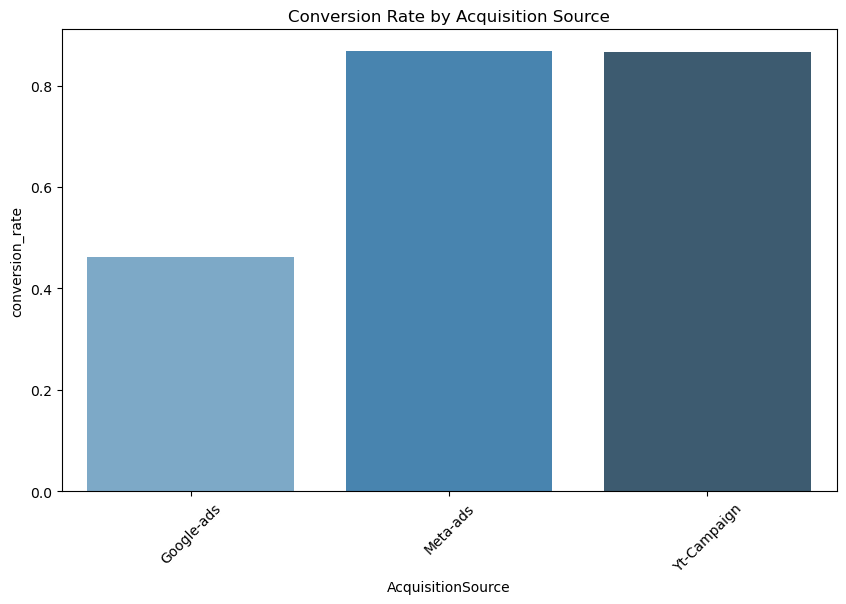

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='conversion_rate', data=conversion_cac, palette='Blues_d')
plt.title('Conversion Rate by Acquisition Source')
plt.xticks(rotation=45)
plt.show()

C:\Users\Durga\AppData\Local\Temp\ipykernel_10808\2545945767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='CAC', data=conversion_cac, palette='Reds')
) missing from font(s) DejaVu Sans.ckages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


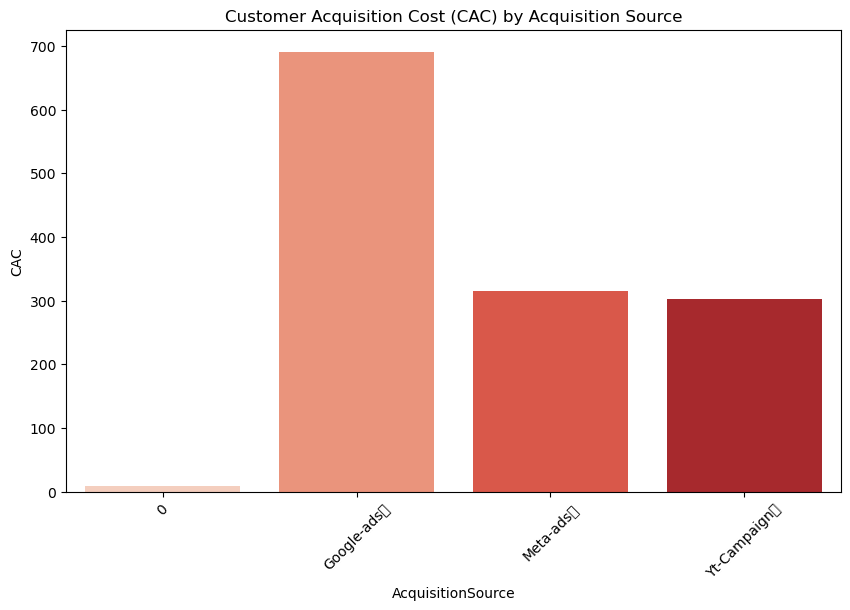

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='CAC', data=conversion_cac, palette='Reds')
plt.title('Customer Acquisition Cost (CAC) by Acquisition Source')
plt.xticks(rotation=45)
plt.show()

In [36]:
best_conversion = conversion_cac.sort_values(by='conversion_rate', ascending=False).iloc[0]
best_cac = conversion_cac.sort_values(by='CAC').iloc[0]

print(f"Highest conversion rate: {best_conversion['AcquisitionSource']} with {best_conversion['conversion_rate']:.2%}")
print(f"Lowest CAC: {best_cac['AcquisitionSource']} with ₹{best_cac['CAC']:.2f} per customer")

Highest conversion rate: Meta-ads with 86.71%
Lowest CAC: Yt-Campaign with ₹302.45 per customer


In [38]:
conversion_cac['AcquisitionSource'].unique()

array(['Google-ads', 'Meta-ads', 'Yt-Campaign'], dtype=object)

In [40]:
# Remove rows where AcquisitionSource is '0'
df = df[df['AcquisitionSource'] != '0']

# Remove carriage returns and whitespace from campaign names
df['AcquisitionSource'] = df['AcquisitionSource'].str.strip().str.replace('\r', '')

In [42]:
conversion_cac = df.groupby('AcquisitionSource').agg(
    total_customers=('CustID', 'nunique'),
    total_transactions=('TransactionID', 'nunique'),
    total_cost=('ProductCost', lambda x: (x * df.loc[x.index, 'OrderQuantity']).sum())
).reset_index()

conversion_cac['conversion_rate'] = conversion_cac['total_customers'] / conversion_cac['total_transactions']
conversion_cac['CAC'] = conversion_cac['total_cost'] / conversion_cac['total_customers']

conversion_cac.sort_values(by='conversion_rate', ascending=False)

,AcquisitionSource,total_customers,total_transactions,total_cost,conversion_rate,CAC
1,Meta-ads,4731,5456,1.493116e+06,0.867119,315.602710
2,Yt-Campaign,4756,5492,1.438438e+06,0.865987,302.446990
0,Google-ads,16658,36085,1.151215e+07,0.461632,691.088182


In [44]:
best_conversion = conversion_cac.sort_values(by='conversion_rate', ascending=False).iloc[0]
best_cac = conversion_cac.sort_values(by='CAC').iloc[0]

print(f"Highest conversion rate: {best_conversion['AcquisitionSource']} with {best_conversion['conversion_rate']:.2%}")
print(f"Lowest CAC: {best_cac['AcquisitionSource']} with ₹{best_cac['CAC']:.2f} per customer")

Highest conversion rate: Meta-ads with 86.71%
Lowest CAC: Yt-Campaign with ₹302.45 per customer


C:\Users\Durga\AppData\Local\Temp\ipykernel_10808\206286955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='conversion_rate', data=conversion_cac, palette='Blues_d')


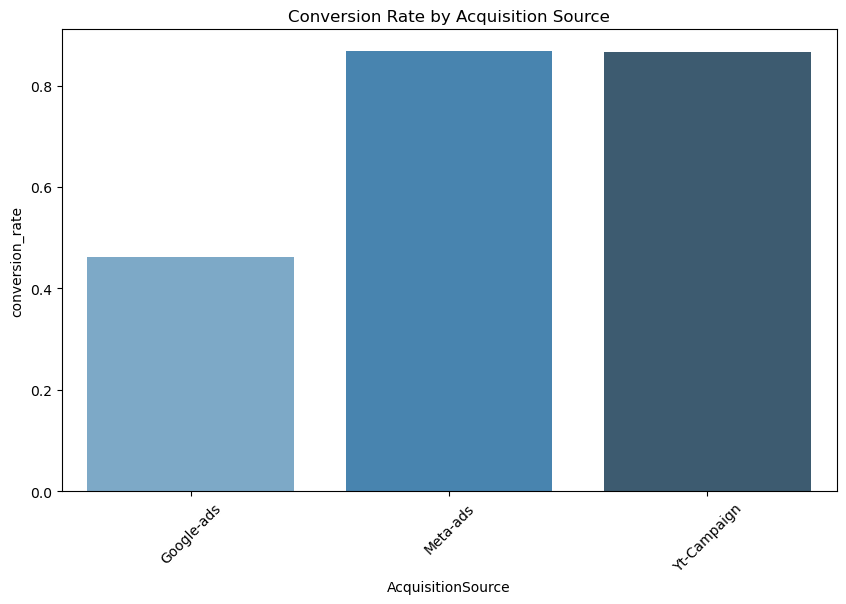

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='conversion_rate', data=conversion_cac, palette='Blues_d')
plt.title('Conversion Rate by Acquisition Source')
plt.xticks(rotation=45)
plt.show()

C:\Users\Durga\AppData\Local\Temp\ipykernel_10808\2545945767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='CAC', data=conversion_cac, palette='Reds')


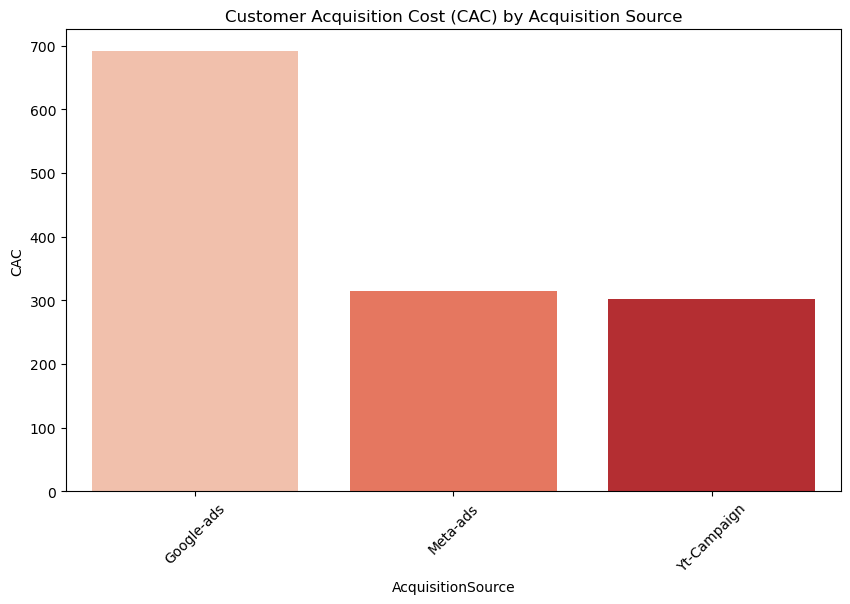

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='CAC', data=conversion_cac, palette='Reds')
plt.title('Customer Acquisition Cost (CAC) by Acquisition Source')
plt.xticks(rotation=45)
plt.show()

## ✅ Insights:
- The campaign with the highest conversion rate is Meta-ads with 86.71%.
- The campaign with the lowest CAC is Yt-Campaign with ₹302.45 per customer.
- Recommendation: Prioritize campaigns with a balance of high conversion and low CAC for future investments.